In [1]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'NanumGothic'


# 데이터 불러오기
data = pd.read_csv("data2.csv", encoding='cp949')  # 파일 경로에 맞게 수정
# normal = 중위권소득 노인
data['총독거노인수']=data['국민기초생활보장 수급권자']+data['저소득노인']+data['normal']

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Load custom font
nanum_gothic_path = '/Users/Miles/Library/Fonts/NanumGothic.ttf'
prop = fm.FontProperties(fname=nanum_gothic_path)

# Set the custom font for Matplotlib
plt.rcParams['font.family'] = prop.get_name()

In [35]:
data['노인시설수요량']=data['총독거노인수']/data['입소정원']-data['총노인시설수']

In [36]:
print(data.info())
print(data.describe())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   시군구명                  423 non-null    object 
 1   행정동명                  423 non-null    object 
 2   총생활인구수                423 non-null    float64
 3   총노인시설수                423 non-null    int64  
 4   입소정원                  423 non-null    int64  
 5   총노인생활인구수              423 non-null    float64
 6   노인생활인구비율              423 non-null    float64
 7   국민기초생활보장 수급권자         423 non-null    int64  
 8   저소득노인                 423 non-null    int64  
 9   normal                423 non-null    int64  
 10  Total bus             423 non-null    int64  
 11  Total subway          423 non-null    int64  
 12  Total Transportation  423 non-null    int64  
 13  전체인구                  423 non-null    int64  
 14  65세이상 인구              423 non-null    int64  
 15  고령자 비율                4

,시군구명,행정동명,총생활인구수,총노인시설수,입소정원,총노인생활인구수,노인생활인구비율,국민기초생활보장 수급권자,저소득노인,normal,Total bus,Total subway,Total Transportation,전체인구,65세이상 인구,고령자 비율,총독거노인수,노인시설수요량,Cluster_Labels
0,종로구,사직동,25308.006030,1,29,2201.444122,11.496093,56,10,447,27,1,28,9355,1808,5.174226,513,16.689655,1
1,종로구,삼청동,6084.941765,1,29,590.946975,10.296934,19,4,190,16,0,16,2642,626,4.220447,213,6.344828,1
2,종로구,부암동,14174.375960,1,29,1684.234649,8.415915,58,16,385,34,0,34,9536,1814,5.256891,459,14.827586,1
3,종로구,평창동,17494.976660,3,29,2491.826055,7.020946,56,22,716,54,0,54,17858,3495,5.109585,794,24.379310,3
4,종로구,무악동,6495.619954,3,29,914.819717,7.100437,88,20,219,3,0,3,8052,1476,5.455285,327,8.275862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,강동구,둔촌1동,4584.767638,0,29,548.400925,8.360248,1,0,1,9,1,10,73,11,6.636364,2,0.068966,1
419,강동구,둔촌2동,27026.214900,0,29,3979.322536,6.791662,169,31,634,30,3,33,24277,4250,5.712235,834,28.758621,3
420,강동구,암사1동,25105.689550,0,29,3103.788530,8.088724,547,72,1095,15,0,15,34271,6303,5.437252,1714,59.103448,0
421,강동구,천호2동,43363.509550,0,29,5166.347522,8.393456,658,55,1086,26,0,26,33825,6140,5.508958,1799,62.034483,0


/Users/Miles/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Miles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


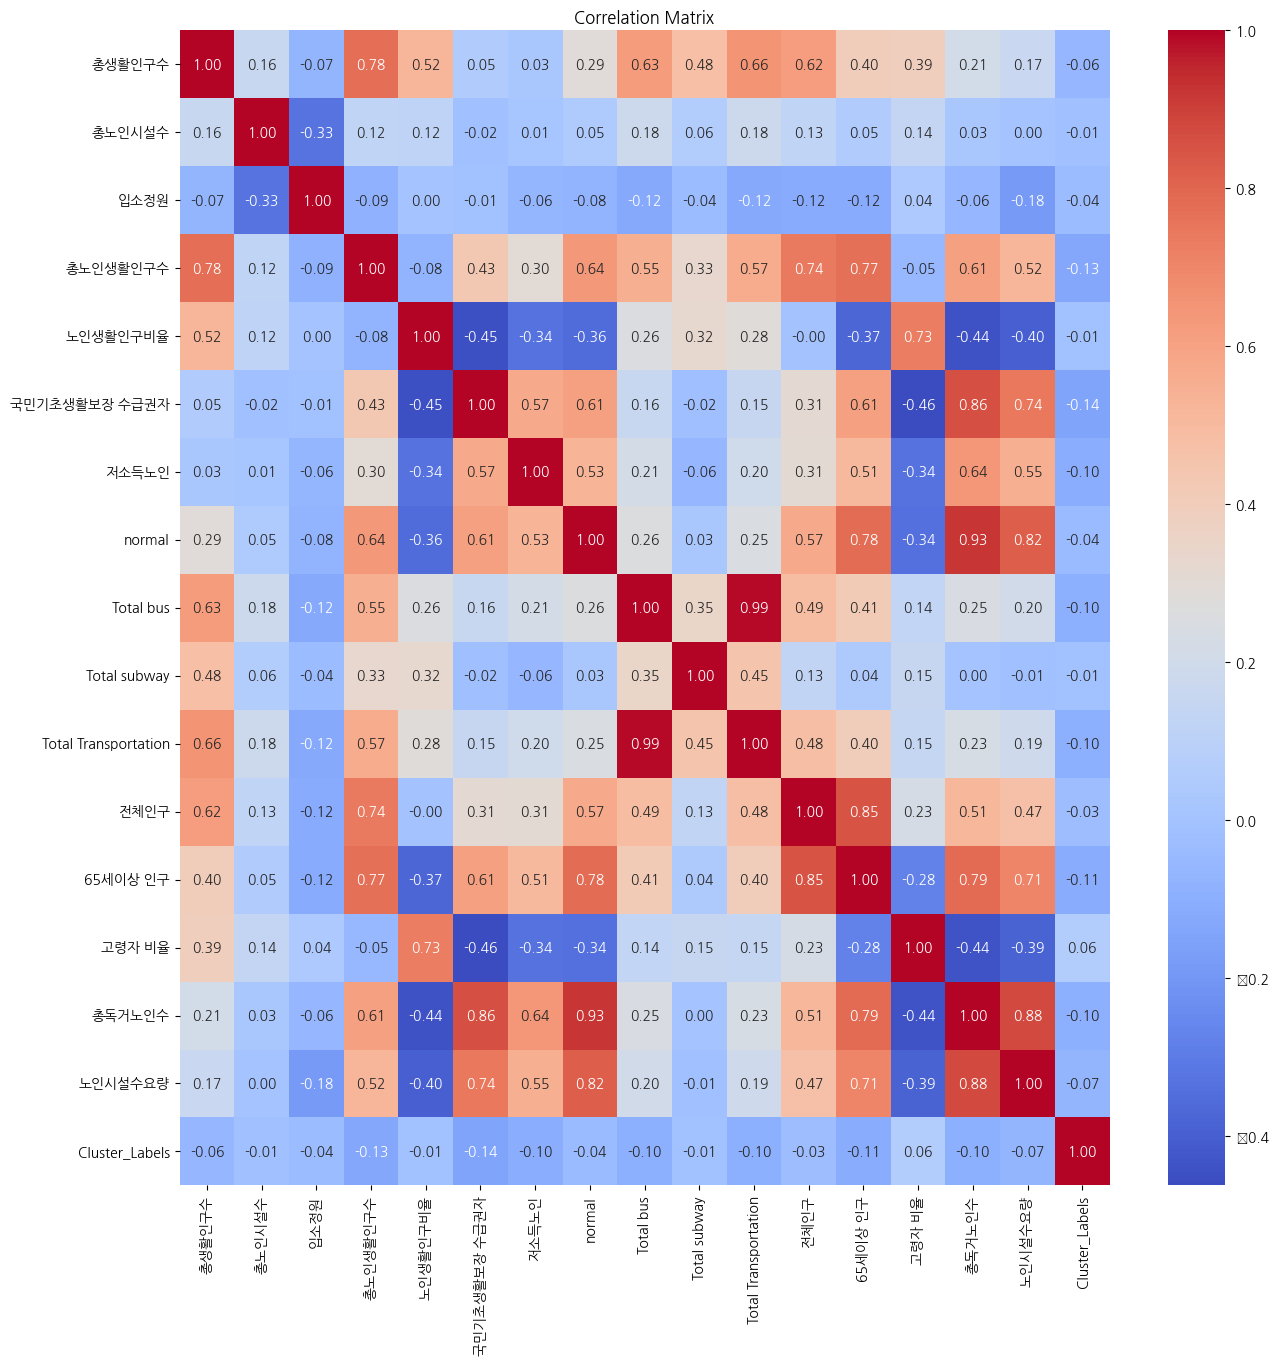

In [37]:
import seaborn as sns

# Create a correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
import numpy as np
print("NaN or Inf values in DataFrame:")
print(data.isna().sum())
print(data.isin([np.inf, -np.inf]).sum())

NaN or Inf values in DataFrame:
시군구명                    0
행정동명                    0
총생활인구수                  0
총노인시설수                  0
입소정원                    0
총노인생활인구수                0
노인생활인구비율                0
국민기초생활보장 수급권자           0
저소득노인                   0
normal                  0
Total bus               0
Total subway            0
Total Transportation    0
전체인구                    0
65세이상 인구                0
고령자 비율                  0
총독거노인수                  0
노인시설수요량                 0
Cluster_Labels          0
dtype: int64
시군구명                    0
행정동명                    0
총생활인구수                  0
총노인시설수                  0
입소정원                    0
총노인생활인구수                0
노인생활인구비율                0
국민기초생활보장 수급권자           0
저소득노인                   0
normal                  0
Total bus               0
Total subway            0
Total Transportation    0
전체인구                    0
65세이상 인구                0
고령자 비율                  0
총독거노인수                  0
노인시설수요량            

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Drop NaN values
data = data.dropna()

# Replace infinite values with NaN and drop NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Separate independent variables (X) and dependent variable (y)
X = data.drop(columns=['노인시설수요량', '시군구명', '행정동명'])
y = data['노인시설수요량']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest model creation and training
rf_model = RandomForestRegressor()
rf_model.fit(X_scaled, y)

# Feature importance
feature_importances = rf_model.feature_importances_

# Sorting feature indices by importance
selected_features_indices = feature_importances.argsort()[::-1]

# Selecting top 5 features
k = 5
selected_features = X.columns[selected_features_indices][:k]

# Display selected features
print("Selected Features based on Feature Importance:\n", selected_features)


Selected Features based on Feature Importance:
 Index(['총독거노인수', '입소정원', '총노인시설수', 'normal', '65세이상 인구'], dtype='object')


In [40]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Clustering

### K-means

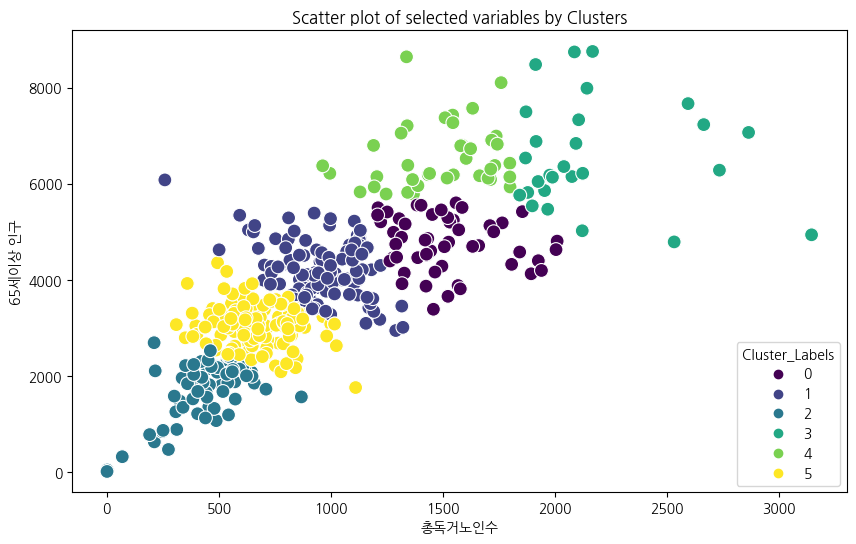

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 선택할 변수 지정
selected_columns = ['총독거노인수', '65세이상 인구']

# 선택한 변수만으로 데이터 구성
X = data[selected_columns]

# 데이터 표준화 (K-means를 적용하기 전에는 표준화를 권장합니다)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# K-means 클러스터링 수행
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster_Labels'] = kmeans.fit_predict(X_standardized)

# 클러스터별 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=selected_columns[0], y=selected_columns[1], hue='Cluster_Labels', data=data, palette='viridis', s=100)
plt.title('Scatter plot of selected variables by Clusters')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.show()

# grouped_data = data.groupby('행정동명')
# data

In [10]:
# Group by clusters and calculate the mean for each feature
cluster_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()

# Display the cluster means
cluster_means

/var/folders/lb/51qrltms4b967grbtq6l4l7c0000gn/T/ipykernel_25489/1345617627.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()


,총노인시설수,고령자 비율,노인시설수요량,저소득노인,국민기초생활보장 수급권자
Cluster_Labels,,,,,
0,1.867925,5.171769,52.084033,49.283019,483.528302
1,2.324561,5.972701,33.778955,31.421053,251.956140
2,2.220588,6.370233,13.550215,14.808824,114.573529
3,2.481481,4.629196,77.466622,63.481481,791.962963
4,3.769231,5.522303,50.866553,51.846154,450.641026
5,2.631148,6.483063,22.454150,21.532787,163.918033


### comparing clusters by weighted sum approach

In [11]:
columns_to_consider = ['총노인시설수', '고령자 비율', '노인시설수요량', '저소득노인', '국민기초생활보장 수급권자']

# Extract the columns to be considered
data_to_scale = cluster_means[columns_to_consider]

# Standardize (scale) the values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_to_scale)

# Convert the scaled values back to a DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_consider)

# Define weights for each column
weights = [4, 2, 4, 1, 1] # Adjust weights based on importance

# Calculate the weighted sum for each cluster
scaled_df['Composite_Score'] = (scaled_df[columns_to_consider] * weights).sum(axis=1)

# Identify the cluster with the highest composite score
best_cluster = scaled_df.loc[scaled_df['Composite_Score'].idxmax()]

print("Best Cluster:")
print(best_cluster)

Best Cluster:
총노인시설수              2.051411
고령자 비율             -0.257415
노인시설수요량             0.432379
저소득노인               0.753687
국민기초생활보장 수급권자       0.323359
Composite_Score    10.497374
Name: 4, dtype: float64


Cluster 4 is picked

### Showing the corresponding dongs in cluster

In [12]:
cluster_label_to_view = 4

# Filter the DataFrame for objects in Cluster 4
objects_in_cluster_Kmea = data[data['Cluster_Labels'] == cluster_label_to_view]['행정동명']

objects_in_cluster_Kmea

88     답십리2동
89      장안1동
102      묵1동
105     신내1동
123      종암동
142     방학1동
150     도봉1동
151     도봉2동
154     월계3동
155     공릉2동
161     상계1동
175      구산동
183      진관동
196    북가좌2동
200      연희동
211     성산2동
215      공덕동
230     신정3동
234     신정4동
250     방화1동
254     우장산동
262     개봉2동
267     구로2동
268     개봉1동
269     오류2동
271     독산1동
280      여의동
299     상도1동
307      대방동
311    노량진1동
312     사당2동
331      은천동
336      미성동
352     양재1동
374      세곡동
388      오금동
406      강일동
420     암사1동
421     천호2동
Name: 행정동명, dtype: object

### K-medoids

/Users/Miles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


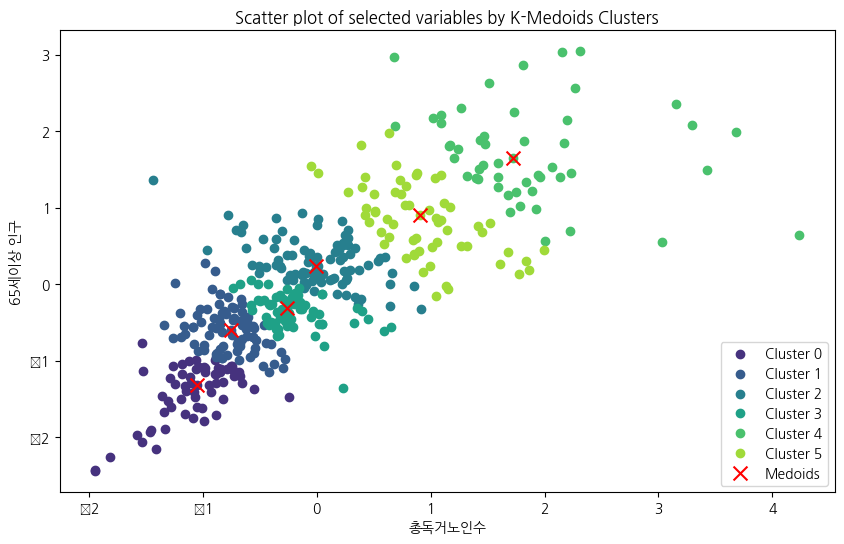

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# 선택할 변수 지정
selected_columns = ['총독거노인수', '65세이상 인구']

# 선택한 변수만으로 데이터 구성
X = data[selected_columns]

# 데이터 표준화 (K-Medoids를 적용하기 전에는 표준화를 권장합니다)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 거리 행렬 계산
distance_matrix = calculate_distance_matrix(X_standardized)

# K-Medoids 클러스터링 수행
n_clusters = 6
initial_medoids = [0, 1, 2, 3, 4, 5]  # 초기 중심 포인트의 인덱스를 선택
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# 클러스터별 산점도 시각화
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', n_clusters)
for i, cluster in enumerate(clusters):
    plt.scatter(X_standardized[cluster, 0], X_standardized[cluster, 1], color=colors[i], label=f'Cluster {i}')

# 중심 포인트 표시
medoid_points = X_standardized[medoids]
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], marker='x', color='red', s=100, label='Medoids')

plt.title('Scatter plot of selected variables by K-Medoids Clusters')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.legend()
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Assign cluster labels to your original data
data['Cluster_Labels'] = -1  # Initialize with a placeholder value
for cluster_label, cluster in enumerate(clusters):
    data.loc[data.index.isin(cluster), 'Cluster_Labels'] = cluster_label

# Group by clusters and calculate the mean for each feature
clustering_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()

clustering_means

/var/folders/lb/51qrltms4b967grbtq6l4l7c0000gn/T/ipykernel_25489/930198912.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clustering_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()


,총노인시설수,고령자 비율,노인시설수요량,저소득노인,국민기초생활보장 수급권자
Cluster_Labels,,,,,
0,2.142857,6.382546,12.700068,14.761905,112.253968
1,2.651163,6.545961,19.565582,18.895349,136.395349
2,1.677419,5.835834,35.325885,31.569892,269.741935
3,3.376812,6.263210,29.940478,28.753623,232.550725
4,3.274510,4.981926,67.744885,62.313725,656.352941
5,2.147541,5.334985,50.139936,47.721311,453.918033


### comparing clusters by weighted sum approach

In [15]:
columns_to_consider = ['총노인시설수', '고령자 비율', '노인시설수요량', '저소득노인', '국민기초생활보장 수급권자']

# Extract the columns to be considered
data_to_scale = clustering_means[columns_to_consider]

# Standardize (scale) the values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_to_scale)

# Convert the scaled values back to a DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_consider)

# Define weights for each column
weights = [4, 2, 4, 2, 1] # Adjust weights based on importance

# Calculate the weighted sum for each cluster
scaled_df['Composite_Score'] = (scaled_df[columns_to_consider] * weights).sum(axis=1)

# Identify the cluster with the highest composite score
best_cluster = scaled_df.loc[scaled_df['Composite_Score'].idxmax()]

print("Best Cluster:")
print(best_cluster)

Best Cluster:
총노인시설수              1.176202
고령자 비율             -1.595095
노인시설수요량             1.719408
저소득노인               1.722094
국민기초생활보장 수급권자       1.817932
Composite_Score    13.654370
Name: 4, dtype: float64


Cluster 4 is picked

### Showing the corresponding dongs in cluster

In [16]:
cluster_label_to_view = 4

# Filter the DataFrame for objects in Cluster 4
objects_in_cluster_Kmed = data[data['Cluster_Labels'] == cluster_label_to_view]['행정동명']

objects_in_cluster_Kmed

70       중곡4동
83       청량리동
84        용신동
85        제기동
86       전농1동
89       장안1동
105      신내1동
107      면목본동
108      망우본동
123       종암동
124       석관동
127       번3동
130      수유3동
131       삼양동
133       송중동
134       송천동
137       인수동
150      도봉1동
151      도봉2동
153      월계2동
154      월계3동
161      상계1동
167    상계3.4동
169    중계2.3동
170      공릉1동
171       녹번동
172      불광1동
183       진관동
184      불광2동
185      응암3동
186       역촌동
196     북가좌2동
211      성산2동
215       공덕동
230      신정3동
234      신정4동
238      등촌3동
252      방화3동
253      화곡1동
267      구로2동
268      개봉1동
269      오류2동
275      시흥1동
299      상도1동
352      양재1동
373       수서동
374       세곡동
388       오금동
420      암사1동
421      천호2동
422        길동
Name: 행정동명, dtype: object

### Hierarchical

/var/folders/lb/51qrltms4b967grbtq6l4l7c0000gn/T/ipykernel_25489/3218663048.py:22: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


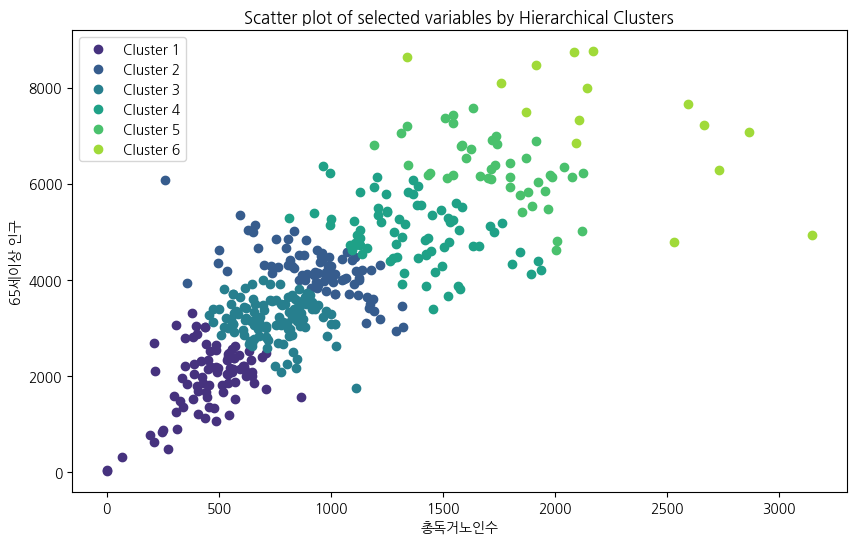

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pyclustering.utils import calculate_distance_matrix

# 선택할 변수 지정
selected_columns = ['총독거노인수', '65세이상 인구']

# 선택한 변수만으로 데이터 구성
X = data[selected_columns]

# 데이터 표준화 (Hierarchical Clustering를 적용하기 전에는 표준화를 권장합니다)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 거리 행렬 계산
distance_matrix = calculate_distance_matrix(X_standardized)

# Hierarchical Clustering 수행
linkage_matrix = linkage(distance_matrix, method='ward')

# Cut the dendrogram to form clusters
num_clusters = 6
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add a new column for cluster labels to the original DataFrame
data['Cluster_Labels'] = cluster_labels

# Scatter plot of selected variables by Hierarchical Clusters
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', num_clusters)
for i in range(1, num_clusters + 1):
    cluster_data = data[data['Cluster_Labels'] == i]
    plt.scatter(cluster_data[selected_columns[0]], cluster_data[selected_columns[1]], color=colors[i - 1], label=f'Cluster {i}')

plt.title('Scatter plot of selected variables by Hierarchical Clusters')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.legend()
plt.show()


In [18]:
# Calculate the average values of all features grouped by clusters
cluster_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()

cluster_means

/var/folders/lb/51qrltms4b967grbtq6l4l7c0000gn/T/ipykernel_25489/48060610.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = data.groupby('Cluster_Labels')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()


,총노인시설수,고령자 비율,노인시설수요량,저소득노인,국민기초생활보장 수급권자
Cluster_Labels,,,,,
1,1.943182,6.474685,14.372776,14.886364,113.727273
2,2.268293,6.087942,33.489313,31.865854,243.219512
3,3.059322,6.353047,24.627443,23.618644,188.161017
4,1.315789,5.298899,46.653406,42.921053,422.052632
5,3.363636,5.134676,60.870467,61.272727,564.386364
6,5.600000,4.811619,80.436280,59.733333,802.200000


### comparing clusters by weighted sum approach

In [19]:
columns_to_consider = ['총노인시설수', '고령자 비율', '노인시설수요량', '저소득노인', '국민기초생활보장 수급권자']

# Extract the columns to be considered
data_to_scale = cluster_means[columns_to_consider]

# Standardize (scale) the values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_to_scale)

# Convert the scaled values back to a DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_consider)

# Define weights for each column
weights = [4, 2, 4, 1, 1] # Adjust weights based on importance

# Calculate the weighted sum for each cluster
scaled_df['Composite_Score'] = (scaled_df[columns_to_consider] * weights).sum(axis=1)

# Identify the cluster with the highest composite score
best_cluster = scaled_df.loc[scaled_df['Composite_Score'].idxmax()]

print("Best Cluster:")
print(best_cluster)

Best Cluster:
총노인시설수              1.944818
고령자 비율             -1.381015
노인시설수요량             1.661296
저소득노인               1.190785
국민기초생활보장 수급권자       1.736091
Composite_Score    14.589302
Name: 5, dtype: float64


Cluster 5 is picked

### Showing the corresponding dongs in cluster

In [20]:
cluster_label_to_view = 5

# Filter the DataFrame for objects in Cluster 5
objects_in_cluster_Hier = data[data['Cluster_Labels'] == cluster_label_to_view]['행정동명']

objects_in_cluster_Hier

70       중곡4동
83       청량리동
84        용신동
85        제기동
86       전농1동
89       장안1동
105      신내1동
107      면목본동
123       종암동
130      수유3동
131       삼양동
132       미아동
133       송중동
142      방학1동
150      도봉1동
151      도봉2동
153      월계2동
154      월계3동
161      상계1동
167    상계3.4동
170      공릉1동
175       구산동
184      불광2동
185      응암3동
196     북가좌2동
200       연희동
211      성산2동
215       공덕동
234      신정4동
250      방화1동
252      방화3동
262      개봉2동
267      구로2동
268      개봉1동
269      오류2동
271      독산1동
275      시흥1동
299      상도1동
331       은천동
352      양재1동
374       세곡동
388       오금동
420      암사1동
421      천호2동
Name: 행정동명, dtype: object

### Gaussian Mixture

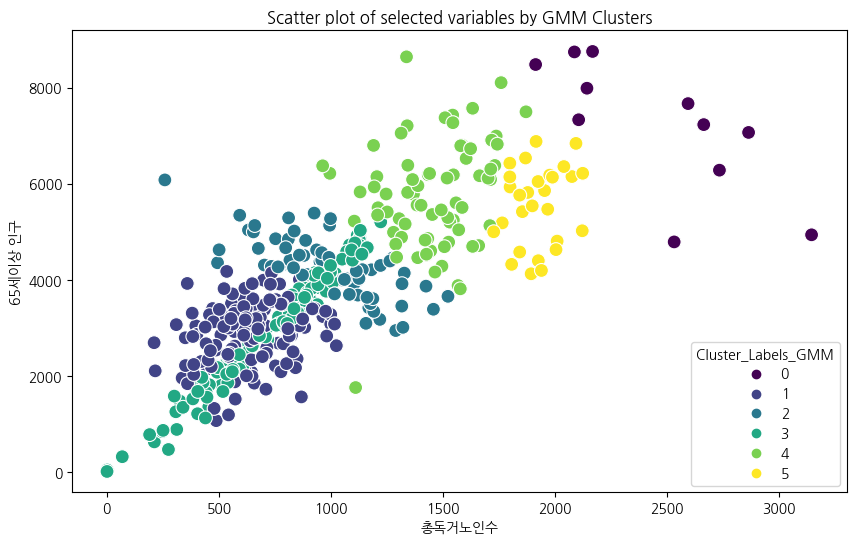

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 선택할 변수 지정
selected_columns = ['총독거노인수', '65세이상 인구']

# 선택한 변수만으로 데이터 구성
X = data[selected_columns]

# 데이터 표준화 (Gaussian Mixture Model을 적용하기 전에는 표준화를 권장합니다)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Gaussian Mixture Model 클러스터링 수행
n_components = 6
gmm = GaussianMixture(n_components=n_components, random_state=0)
data['Cluster_Labels_GMM'] = gmm.fit_predict(X_standardized)

# 클러스터별 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=selected_columns[0], y=selected_columns[1], hue='Cluster_Labels_GMM', data=data, palette='viridis', s=100)
plt.title('Scatter plot of selected variables by GMM Clusters')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.show()

In [22]:
# Calculate the average values of all features grouped by GMM clusters
cluster_means_gmm = data.groupby('Cluster_Labels_GMM')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()

cluster_means_gmm

/var/folders/lb/51qrltms4b967grbtq6l4l7c0000gn/T/ipykernel_25489/606657347.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means_gmm = data.groupby('Cluster_Labels_GMM')['총노인시설수','고령자 비율','노인시설수요량','저소득노인','국민기초생활보장 수급권자'].mean()


,총노인시설수,고령자 비율,노인시설수요량,저소득노인,국민기초생활보장 수급권자
Cluster_Labels_GMM,,,,,
0,3.545455,4.508598,89.748219,65.181818,861.727273
1,3.612403,6.606721,20.109064,19.674419,151.689922
2,2.846154,6.047970,35.770674,32.384615,257.123077
3,0.870690,5.955206,24.900316,24.698276,201.275862
4,2.554054,5.460469,49.529266,46.783784,448.135135
5,2.500000,4.628616,67.409786,67.035714,672.392857


### comparing clusters by weighted sum approach

In [24]:
columns_to_consider = ['총노인시설수', '고령자 비율', '노인시설수요량', '저소득노인', '국민기초생활보장 수급권자']

# Extract the columns to be considered
data_to_scale = cluster_means_gmm[columns_to_consider]

# Standardize (scale) the values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_to_scale)

# Convert the scaled values back to a DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_consider)

# Define weights for each column
weights = [4, 2, 4, 1, 1] # Adjust weights based on importance

# Calculate the weighted sum for each cluster
scaled_df['Composite_Score'] = (scaled_df[columns_to_consider] * weights).sum(axis=1)

# Identify the cluster with the highest composite score
best_cluster = scaled_df.loc[scaled_df['Composite_Score'].idxmax()]

print("Best Cluster:")
print(best_cluster)

Best Cluster:
총노인시설수              0.979198
고령자 비율             -1.349359
노인시설수요량             1.712035
저소득노인               1.212891
국민기초생활보장 수급권자       1.653588
Composite_Score    10.932695
Name: 0, dtype: float64


Cluster 0 is picked

### Showing the corresponding dongs in cluster

In [25]:
cluster_label_to_view = 0

# Filter the DataFrame for objects in Cluster 0
objects_in_cluster_GMM = data[data['Cluster_Labels_GMM'] == cluster_label_to_view]['행정동명']

objects_in_cluster_GMM

127       번3동
134       송천동
137       인수동
169    중계2.3동
171       녹번동
172      불광1동
186       역촌동
238      등촌3동
253      화곡1동
373       수서동
422        길동
Name: 행정동명, dtype: object

# Selecting the dongs

In [26]:
data_Hier = pd.DataFrame({'행정동명': objects_in_cluster_Hier.values})

data_Kmea = pd.DataFrame({'행정동명': objects_in_cluster_Kmea.values})

data_Kmed = pd.DataFrame({'행정동명': objects_in_cluster_Kmed.values})

data_GMM = pd.DataFrame({'행정동명': objects_in_cluster_GMM.values})

In [30]:
import pandas as pd

# data_Hier, data_Kmea, data_Kmed, data_GMM을 리스트로 저장
data_frames = [data_Hier, data_Kmea, data_Kmed, data_GMM]

# 중복을 허용해서 데이터프레임 합치기
merged_df = pd.concat(data_frames, ignore_index=True)

# 행정동별 등장 횟수 계산
counts_by_dong = merged_df['행정동명'].value_counts()

# 3번 이상 등장한 행정동 찾기
dongs_at_least_three_occurrences = counts_by_dong[counts_by_dong >= 3].index.tolist()

# 결과 출력
print("3번 이상 등장한 행정동:")
print(dongs_at_least_three_occurrences)


3번 이상 등장한 행정동:
['오류2동', '도봉2동', '개봉1동', '구로2동', '상도1동', '양재1동', '신정4동', '공덕동', '성산2동', '세곡동', '북가좌2동', '오금동', '암사1동', '천호2동', '상계1동', '월계3동', '종암동', '도봉1동', '장안1동', '신내1동']
